In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
# SibSp: Number of Siblings/Spouses Aboard
# Parch: Number of Parents/Children Aboard
# Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
df

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

df_copied = df.copy()

In [6]:
df

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [7]:
df.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [8]:
# Display a count of the survivors
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

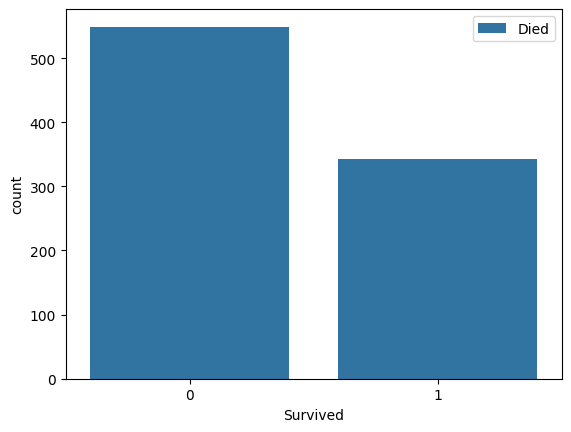

In [9]:
# Visualize the count of survivors using "countplot" of Seaborn
import seaborn as sns
sns.countplot(x='Survived', data=df)
# Add legends of both color
plt.legend(['Died', 'Survived'])
plt.show()

In [10]:
# Use pivot_table function of Pandas to obtain survival rate by Gender and PClass
gender = df.pivot_table(df, index=['Gender']).Survived
gender

Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
# Group by Gender
gender_df = df.groupby(by="Gender").Survived.value_counts()
gender_df

Gender  Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [12]:
# Use pivot_table function of Pandas to obtain survival rate by Gender and PClass
plot_gender_pclass_df = df.pivot_table(df, index=['Gender', 'Pclass']).Survived
plot_gender_pclass_df

Gender  Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

<Axes: title={'center': 'Gender PClass Survival Count'}, ylabel='Gender'>

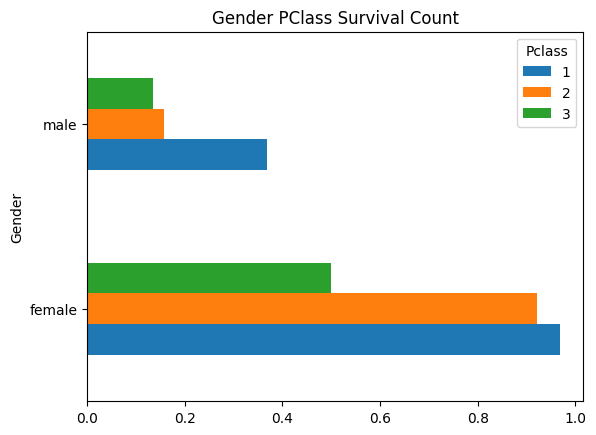

In [13]:
# PLot using plot
plot_gender_pclass_df.unstack().plot.barh(title="Gender PClass Survival Count")

In [14]:
df.min()

Pclass           1
Gender      female
Age           0.42
Fare           0.0
Survived         0
dtype: object

In [15]:
df.max()

Pclass             3
Gender          male
Age             80.0
Fare        512.3292
Survived           1
dtype: object

In [16]:
# Discretize the Age column into 5 categories using cut funciton, equaly spaced starting from 0-18 and so on
# df.Age = df.Age.fillna(df.Age.mean())
# df.Age

df['Age'] = pd.cut(df.Age, bins=5, labels=['0-18', '18-36', '36-54', '54-72', '72+'])
df

,Pclass,Gender,Age,Fare,Survived
0,3,male,18-36,7.2500,0
1,1,female,36-54,71.2833,1
2,3,female,18-36,7.9250,1
3,1,female,36-54,53.1000,1
4,3,male,36-54,8.0500,0
...,...,...,...,...,...
886,2,male,18-36,13.0000,0
887,1,female,18-36,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,18-36,30.0000,1


/tmp/ipykernel_5877/2503110302.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  graph = df.pivot_table(df, index=['Gender', 'Age','Pclass']).Survived


<Axes: title={'center': 'Gender Age PClass Survival Count'}, ylabel='Gender,Age'>

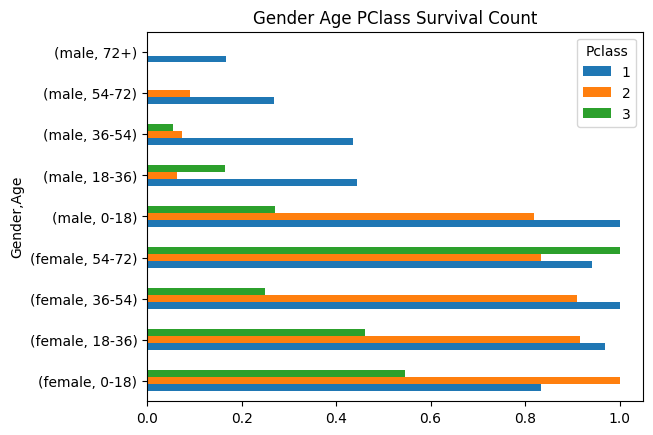

In [17]:
# Obtain Survival Rate by Gender, Age and Pclass
graph = df.pivot_table(df, index=['Gender', 'Age','Pclass']).Survived
graph.unstack().plot.barh(title="Gender Age PClass Survival Count")

In [18]:
graph

Gender  Age    Pclass
female  0-18   1         0.833333
               2         1.000000
               3         0.545455
        18-36  1         0.968750
               2         0.916667
               3         0.461538
        36-54  1         1.000000
               2         0.909091
               3         0.250000
        54-72  1         0.941176
               2         0.833333
               3         1.000000
male    0-18   1         1.000000
               2         0.818182
               3         0.270270
        18-36  1         0.444444
               2         0.062500
               3         0.165563
        36-54  1         0.435897
               2         0.074074
               3         0.055556
        54-72  1         0.269231
               2         0.090909
               3         0.000000
        72+    1         0.166667
               2         0.000000
               3         0.000000
Name: Survived, dtype: float64

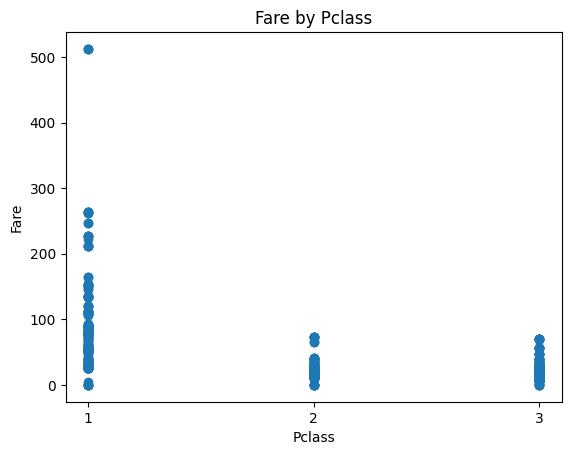

In [19]:
# Scatter plot to # Scatter plot to visualize the "Fare" paid for each PClass{1,2,3}
plt.scatter(df.Pclass, df.Fare, alpha=1)

plt.xticks([1, 2, 3])
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare by Pclass')
plt.show()

In [20]:
y = df_copied.Survived
X = df_copied.drop('Survived', axis=1)
X.head(10)

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
5,3,male,NaN,8.4583
6,1,male,54.0,51.8625
7,3,male,2.0,21.0750
8,3,female,27.0,11.1333
9,2,female,14.0,30.0708


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
df_encoded = pd.get_dummies(df_copied, columns=['Gender'], dtype=int)
df_encoded.head(10)

,Pclass,Age,Fare,Survived,Gender_female,Gender_male
0,3,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,1,0
2,3,26.0,7.9250,1,1,0
3,1,35.0,53.1000,1,1,0
4,3,35.0,8.0500,0,0,1
5,3,NaN,8.4583,0,0,1
6,1,54.0,51.8625,0,0,1
7,3,2.0,21.0750,0,0,1
8,3,27.0,11.1333,1,1,0
9,2,14.0,30.0708,1,1,0


In [23]:
# Obtain statistics of each feature using "describe" function
df_encoded.describe()

,Pclass,Age,Fare,Survived,Gender_female,Gender_male
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838,0.352413,0.647587
std,0.836071,14.526497,49.693429,0.486592,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000,1.000000


In [24]:
df_encoded.isna().sum()

Pclass             0
Age              177
Fare               0
Survived           0
Gender_female      0
Gender_male        0
dtype: int64

In [25]:
df_encoded.Age = df_encoded.Age.fillna(df_encoded.Age.mean())
df_encoded.isna().sum()
df_encoded.head(10)

,Pclass,Age,Fare,Survived,Gender_female,Gender_male
0,3,22.000000,7.2500,0,0,1
1,1,38.000000,71.2833,1,1,0
2,3,26.000000,7.9250,1,1,0
3,1,35.000000,53.1000,1,1,0
4,3,35.000000,8.0500,0,0,1
5,3,29.699118,8.4583,0,0,1
6,1,54.000000,51.8625,0,0,1
7,3,2.000000,21.0750,0,0,1
8,3,27.000000,11.1333,1,1,0
9,2,14.000000,30.0708,1,1,0


In [26]:
df_encoded.corr()

,Pclass,Age,Fare,Survived,Gender_female,Gender_male
Pclass,1.000000,-0.331339,-0.549500,-0.338481,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.069809,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.257307,0.182333,-0.182333
Survived,-0.338481,-0.069809,0.257307,1.000000,0.543351,-0.543351
Gender_female,-0.131900,-0.084153,0.182333,0.543351,1.000000,-1.000000
Gender_male,0.131900,0.084153,-0.182333,-0.543351,-1.000000,1.000000


<Axes: >

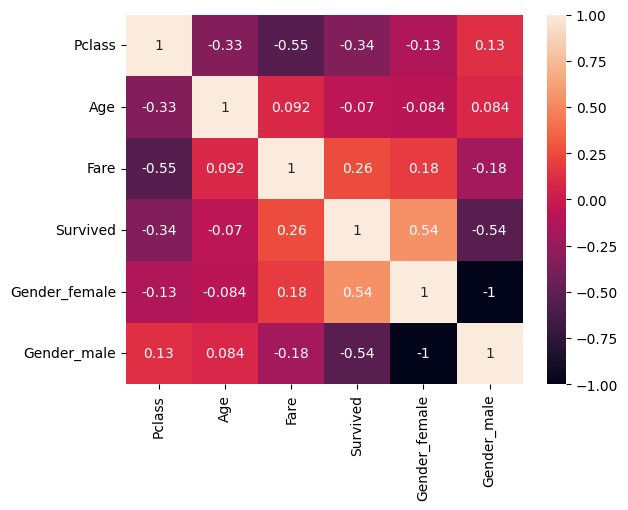

In [27]:
# Visualize correlation (Pearson) between features using heatmap of Seaborn
sns.heatmap(df_encoded.corr(), annot=True)

<Axes: xlabel='Age', ylabel='Count'>

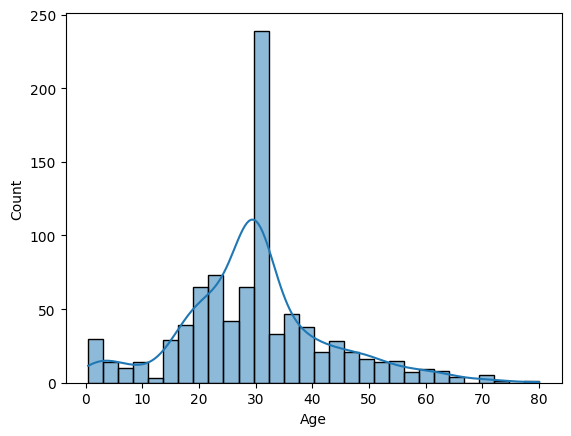

In [28]:
# Visualize the distribution of each feature using histogram having continuous values
# plt.hist(df_encoded[['Age', 'Fare']],normed=True)
sns.histplot(df_encoded['Age'], kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

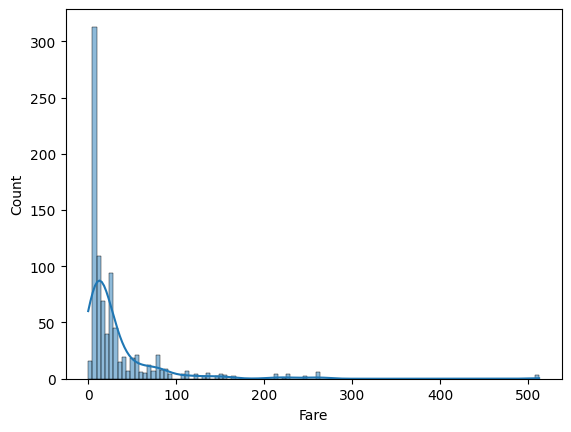

In [29]:
sns.histplot(df_encoded['Fare'], kde=True)

In [30]:
# Split the dataset such that 20% of 
from sklearn.model_selection import train_test_split
y = df_encoded.Survived
X = df_encoded.drop('Survived', axis=1)
X.head(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
X_train.head(10)

,Pclass,Age,Fare,Gender_female,Gender_male
57,3,28.500000,7.2292,0,1
717,2,27.000000,10.5000,1,0
431,3,29.699118,16.1000,1,0
633,1,29.699118,0.0000,0,1
163,3,17.000000,8.6625,0,1
864,2,24.000000,13.0000,0,1
467,1,56.000000,26.5500,0,1
785,3,25.000000,7.2500,0,1
244,3,30.000000,7.2250,0,1
197,3,42.000000,8.4042,0,1


In [32]:
# Instantiate a Gaussaian naive model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [33]:
model

GaussianNB()

In [34]:
model.fit(X_train, y_train)

GaussianNB()

In [35]:
# Redict for first 10 samples
model.predict(X_test[:10])

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [36]:
y_test[:10]

590    0
131    0
628    0
195    1
230    1
646    0
75     0
586    0
569    1
287    0
Name: Survived, dtype: int64

In [37]:
# Compare the predicted values with actual values
model.score(X_test, y_test)

0.8268156424581006

In [38]:
# Make confusion matrix of
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:10], model.predict(X_test[:10]))

array([[7, 0],
       [1, 2]])

In [39]:
# perform prediciton probability
model.predict_proba(X_test[:10])
# Print prediction probaiblity
model.predict_proba(X_test[:10]).round(2)

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.99, 0.01]])

<Axes: >

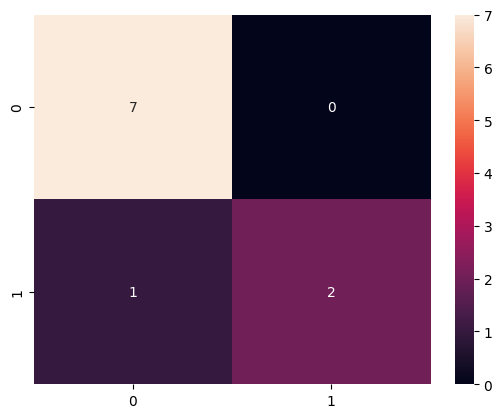

In [40]:
sns.heatmap(confusion_matrix(y_test[:10], model.predict(X_test[:10])), annot=True)

In [41]:
# Give classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [42]:
# Repeat the same process using Categorical Naive Bayes
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8212290502793296

In [44]:
# Hybrid NavieAge Bayes
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.776536312849162

In [ ]:
# List all the Naive Bayes Modesl
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)
